<a href="https://colab.research.google.com/github/fatsasabila/deeplearning_fatsa/blob/main/TaskWeek6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name : Fatsa Vidyaningtyas Sabila

NPM: 2306319445

Original Code: https://www.kaggle.com/code/yossefmohammed/twitter-sentiment-analysis-with-lstm

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
jp797498e_twitter_entity_sentiment_analysis_path = kagglehub.dataset_download('jp797498e/twitter-entity-sentiment-analysis')

print('Data source import complete.')


100%|██████████| 1.99M/1.99M [00:00<00:00, 67.9MB/s]

Extracting files...
Data source import complete.


In [2]:
import pandas as pd

- Lod the training data

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jp797498e/twitter-entity-sentiment-analysis")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/jp797498e/twitter-entity-sentiment-analysis/versions/2


In [7]:
training=pd.read_csv("twitter_training.csv")
test=pd.read_csv("twitter_validation.csv")

In [8]:
training

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
53821,2048,CallOfDuty,Negative,@ CfDuty fix their game new omg challenge with...
53822,2048,CallOfDuty,Negative,@CallofDuty fix your game new omg challenge re...
53823,2048,CallOfDuty,Negative,Dear @CallofDuty fix your stupid game new omg ...
53824,2048,CallOfDuty,Negative,@CallofDuty fix your game new omg challenge cu...


- load the testing data

In [9]:
test

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


- Add headers for the columns in each dataframe:

In [10]:
test.columns = ['Header1', 'company','labels','text']
training.columns = ['Header1', 'company','labels','text']

In [11]:
print(training)
print("---------------------------------------------------------------------")
print(test)

       Header1      company    labels  \
0         2401  Borderlands  Positive   
1         2401  Borderlands  Positive   
2         2401  Borderlands  Positive   
3         2401  Borderlands  Positive   
4         2401  Borderlands  Positive   
...        ...          ...       ...   
53821     2048   CallOfDuty  Negative   
53822     2048   CallOfDuty  Negative   
53823     2048   CallOfDuty  Negative   
53824     2048   CallOfDuty  Negative   
53825     2049   CallOfDuty  Negative   

                                                    text  
0      I am coming to the borders and I will kill you...  
1      im getting on borderlands and i will kill you ...  
2      im coming on borderlands and i will murder you...  
3      im getting on borderlands 2 and i will murder ...  
4      im getting into borderlands and i can murder y...  
...                                                  ...  
53821  @ CfDuty fix their game new omg challenge with...  
53822  @CallofDuty fix your game ne

- Delete unneeded columns

In [12]:
training.drop(columns=["Header1","company"],inplace=True)
test.drop(columns=["Header1","company"],inplace=True)

In [13]:
training.head()

,labels,text
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...


In [14]:
test.head()

,labels,text
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


- Add the two data frame in one datarame

In [15]:
sentiment=pd.concat([training,test],ignore_index=True)
sentiment

,labels,text
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...
...,...,...
54820,Irrelevant,⭐️ Toronto is the arts and culture capital of ...
54821,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
54822,Positive,Today sucked so it’s time to drink wine n play...
54823,Positive,Bought a fraction of Microsoft today. Small wins.


- Check for cleaning data

In [16]:
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54825 entries, 0 to 54824
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   labels  54825 non-null  object
 1   text    54333 non-null  object
dtypes: object(2)
memory usage: 856.8+ KB


In [17]:
sentiment.isnull().sum()

,0
labels,0
text,492


In [18]:
sentiment.dropna(inplace=True)
sentiment.isnull().sum()

,0
labels,0
text,0


In [19]:
sentiment.duplicated().sum()

3470

In [20]:
sentiment.drop_duplicates(inplace=True)
sentiment.duplicated().sum()

0

- preprocessing the text n the data:

In [21]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import numpy as np
nltk.download('wordnet', "/kaggle/working/nltk_data/")
nltk.download('omw-1.4', "/kaggle/working/nltk_data/")
! unzip /kaggle/working/nltk_data/corpora/wordnet.zip -d /kaggle/working/nltk_data/corpora
! unzip /kaggle/working/nltk_data/corpora/omw-1.4.zip -d /kaggle/working/nltk_data/corpora
nltk.data.path.append("/kaggle/working/nltk_data/")

[nltk_data] Downloading package wordnet to
[nltk_data]     /kaggle/working/nltk_data/...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /kaggle/working/nltk_data/...


Archive:  /kaggle/working/nltk_data/corpora/wordnet.zip
   creating: /kaggle/working/nltk_data/corpora/wordnet/
  inflating: /kaggle/working/nltk_data/corpora/wordnet/lexnames  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/data.verb  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/index.adv  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/adv.exc  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/index.verb  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/data.adj  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/index.adj  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/LICENSE  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/citation.bib  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/noun.exc  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/verb.exc  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/README  
  inflating: /kaggle/w

- this function for cleaning the text:

In [22]:

def process_text(text):
    text = re.sub(r'\s+', ' ', text, flags=re.I) # Remove extra white space from text

    text = re.sub(r'\W', ' ', str(text)) # Remove all the special characters from text

    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text) # Remove all single characters from text

    text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove any character that isn't alphabetical

    text = text.lower()

    words = word_tokenize(text)

    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    stop_words = set(stopwords.words("english"))
    Words = [word for word in words if word not in stop_words]

    Words = [word for word in Words if len(word) > 3]

    indices = np.unique(Words, return_index=True)[1]
    cleaned_text = np.array(Words)[np.sort(indices)].tolist()

    return cleaned_text

In [23]:
x=sentiment.drop('labels',axis=1)
y=sentiment.labels

In [24]:
texts=list(x['text'])

In [26]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [29]:
import nltk

# Unduh stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [30]:
cleaned_text = [process_text(text) for text in texts]

In [31]:
print(cleaned_text[:10])

[['coming', 'border', 'kill'], ['getting', 'borderland', 'kill'], ['coming', 'borderland', 'murder'], ['getting', 'borderland', 'murder'], ['getting', 'borderland', 'murder'], ['spent', 'hour', 'making', 'something', 'know', 'huge', 'borderland', 'maya', 'favorite', 'character', 'decided', 'make', 'wallpaper', 'original', 'image', 'versus', 'creation', 'made', 'enjoy', 'twitter', 'mlsiwfjg'], ['spent', 'couple', 'hour', 'something', 'know', 'huge', 'borderland', 'maya', 'favorite', 'character', 'decided', 'make', 'wallpaper', 'original', 'picture', 'compared', 'creation', 'made', 'twitter', 'mlsiwfjg'], ['spent', 'hour', 'something', 'know', 'huge', 'borderland', 'maya', 'favorite', 'character'], ['spent', 'hour', 'making', 'something', 'know', 'huge', 'rhandlerr', 'maya', 'favorite', 'character', 'decided', 'make', 'wallpaper', 'original', 'image', 'versus', 'creation', 'made', 'enjoy', 'twitter', 'mlsiwfjg'], ['spent', 'hour', 'making', 'something', 'know', 'huge', 'rhandlerr', 'maya

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cleaned_text, y, test_size=0.2, random_state=42)

- prepare the data to the model:

In [33]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_vocab = 20000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(X_train)
word_idx = tokenizer.word_index  # Corrected syntax for accessing word index
v = len(word_idx)
print("the size of vocab =", v)  # Corrected spacing
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)


the size of vocab = 19822


In [34]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = 100
X_train = pad_sequences(X_train,maxlen=maxlen)
X_test = pad_sequences(X_test,maxlen=maxlen)



In [35]:
y.value_counts()

,count
labels,
Positive,14994
Negative,14157
Neutral,12205
Irrelevant,9507


- build the model

In [36]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense,Input,GlobalMaxPooling1D,Dropout,Bidirectional
from tensorflow.keras.models import Model
from keras import optimizers
import numpy as np
D=100
inputt=Input(shape=(maxlen,))

In [37]:
from tensorflow.keras.optimizers import Adam
learning_rate = 0.0001  # Set your desired learning rate here
x=Embedding(v+1,D)(inputt)
x = Dropout(0.5)(x)
x = Bidirectional(LSTM(150))(x)
x = Dense(32, activation='relu')(x)
x = Dense(4, activation='softmax')(x)

model = Model(inputt, x)

# Define optimizer with specified learning rate
optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [38]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [40]:
import tensorflow as tf

y_train_one_hot = tf.keras.utils.to_categorical(y_train_encoded)
y_test_one_hot = tf.keras.utils.to_categorical(y_test_encoded)
history = model.fit(X_train, y_train_one_hot, epochs=10, validation_data=(X_test, y_test_one_hot))


Epoch 1/10
1272/1272 ━━━━━━━━━━━━━━━━━━━━ 488s 383ms/step - accuracy: 0.6051 - loss: 0.9703 - val_accuracy: 0.6905 - val_loss: 0.8162
Epoch 2/10
1272/1272 ━━━━━━━━━━━━━━━━━━━━ 484s 380ms/step - accuracy: 0.7226 - loss: 0.7249 - val_accuracy: 0.7493 - val_loss: 0.6614
Epoch 3/10
1272/1272 ━━━━━━━━━━━━━━━━━━━━ 501s 380ms/step - accuracy: 0.7870 - loss: 0.5674 - val_accuracy: 0.7879 - val_loss: 0.5631
Epoch 4/10
1272/1272 ━━━━━━━━━━━━━━━━━━━━ 487s 383ms/step - accuracy: 0.8274 - loss: 0.4671 - val_accuracy: 0.8179 - val_loss: 0.5016
Epoch 5/10
1272/1272 ━━━━━━━━━━━━━━━━━━━━ 484s 381ms/step - accuracy: 0.8519 - loss: 0.4026 - val_accuracy: 0.8231 - val_loss: 0.4704
Epoch 6/10
1272/1272 ━━━━━━━━━━━━━━━━━━━━ 488s 384ms/step - accuracy: 0.8698 - loss: 0.3545 - val_accuracy: 0.8413 - val_loss: 0.4345
Epoch 7/10
1272/1272 ━━━━━━━━━━━━━━━━━━━━ 504s 385ms/step - accuracy: 0.8801 - loss: 0.3233 - val_accuracy: 0.8379 - val_loss: 0.4397
Epoch 8/10
1272/1272 ━━━━━━━━━━━━━━━━━━━━ 493s 388ms/step - ac

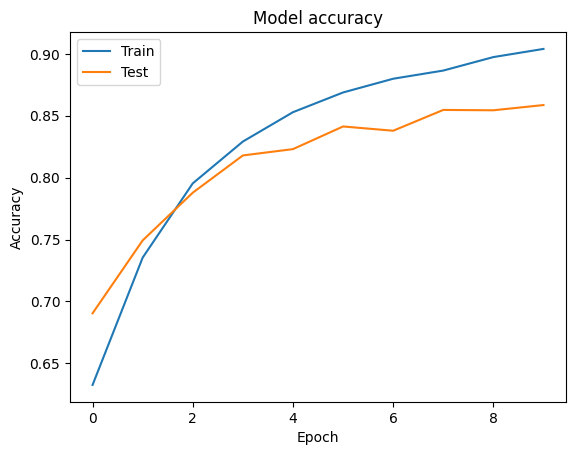

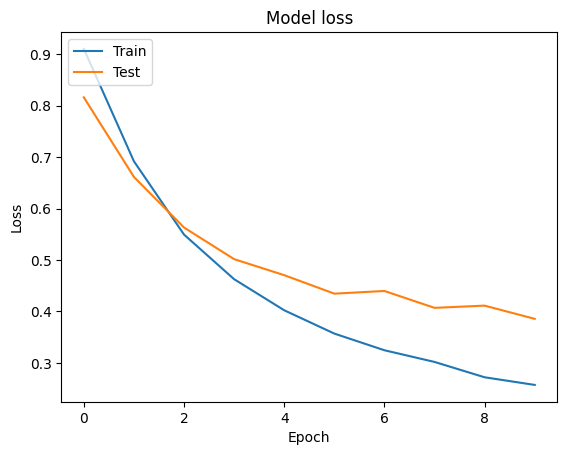

In [41]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [42]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test_one_hot)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


318/318 ━━━━━━━━━━━━━━━━━━━━ 60s 188ms/step - accuracy: 0.8634 - loss: 0.3759
Test Loss: 0.38549497723579407
Test Accuracy: 0.8586454391479492


318/318 ━━━━━━━━━━━━━━━━━━━━ 35s 110ms/step


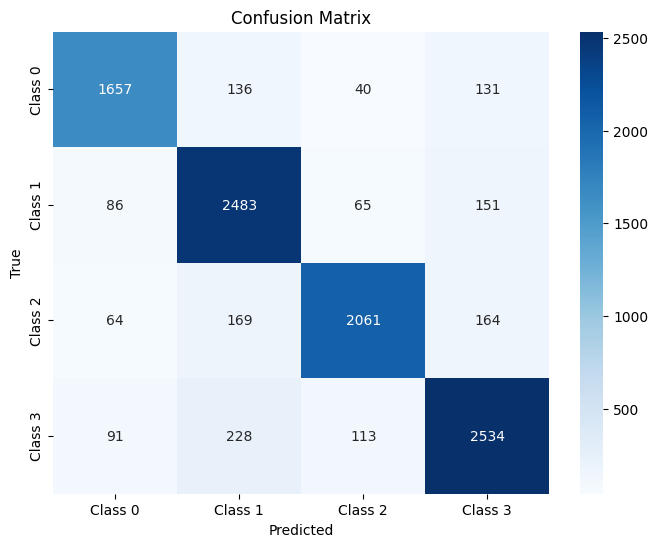

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np


y_pred_probs = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.argmax(y_test_one_hot, axis=1)
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'],
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
